In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM,Dropout,Activation,Bidirectional,Embedding,Dense,Flatten,GlobalMaxPooling1D,SpatialDropout1D
from tensorflow.keras.layers import Conv1D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from gensim.models import Word2Vec, KeyedVectors
import tensorflow_hub as hub
from tensorflow.keras.regularizers import l2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
tf.__version__

Mounted at /content/gdrive


'2.7.0'

In [3]:
movies=pd.read_csv('/content/gdrive/MyDrive/movies_data.csv',encoding= 'unicode_escape')
movies.head()

,S.No.,Movie Name,Director Name,Release Year,Genre,Summary
0,1,Dune,Denis Villeneuve,2021,Action,"Paul Atreides, a brilliant and gifted young ma..."
1,2,Eternals,Chloé Zhao,2021,Action,"The Eternals, a race of immortal beings with s..."
2,3,No Time To Die,Cary Joji Fukunaga,2021,Action,James Bond is enjoying a tranquil life in Jama...
3,4,Halloween Kills,David Gordon Green,2021,Horror,The nightmare isn't over as unstoppable killer...
4,5,The French Dispatch,Wes Anderson,2021,Comedy,A love letter to journalists set in an outpost...


In [4]:
MainGenres=['Drama','Comedy','Action','Horror']
movies=movies[movies['Genre'].isin(MainGenres)]
len(movies)

3584

In [5]:
movies=movies.reset_index()
movies.head(5)

,index,S.No.,Movie Name,Director Name,Release Year,Genre,Summary
0,0,1,Dune,Denis Villeneuve,2021,Action,"Paul Atreides, a brilliant and gifted young ma..."
1,1,2,Eternals,Chloé Zhao,2021,Action,"The Eternals, a race of immortal beings with s..."
2,2,3,No Time To Die,Cary Joji Fukunaga,2021,Action,James Bond is enjoying a tranquil life in Jama...
3,3,4,Halloween Kills,David Gordon Green,2021,Horror,The nightmare isn't over as unstoppable killer...
4,4,5,The French Dispatch,Wes Anderson,2021,Comedy,A love letter to journalists set in an outpost...


In [6]:
movies['GenreID']=movies['Genre'].apply(lambda x:MainGenres.index(x))
movies.head(10)

,index,S.No.,Movie Name,Director Name,Release Year,Genre,Summary,GenreID
0,0,1,Dune,Denis Villeneuve,2021,Action,"Paul Atreides, a brilliant and gifted young ma...",2
1,1,2,Eternals,Chloé Zhao,2021,Action,"The Eternals, a race of immortal beings with s...",2
2,2,3,No Time To Die,Cary Joji Fukunaga,2021,Action,James Bond is enjoying a tranquil life in Jama...,2
3,3,4,Halloween Kills,David Gordon Green,2021,Horror,The nightmare isn't over as unstoppable killer...,3
4,4,5,The French Dispatch,Wes Anderson,2021,Comedy,A love letter to journalists set in an outpost...,1
5,5,6,Last Night in Soho,Edgar Wright,2021,Horror,An aspiring fashion designer is mysteriously a...,3
6,6,7,The Last Duel,Ridley Scott,2021,Drama,Jean de Carrouges is a respected knight known ...,0
7,7,8,Night Teeth,Adam Randall,2021,Action,A college student moonlighting as a chauffeur ...,2
8,9,10,Venom: Let There Be Carnage,Marco Beltrami,2021,Action,Eddie Brock is still struggling to coexist wit...,2
9,10,11,Free Guy,Shawn Levy,2021,Action,When a bank teller discovers he's actually a b...,2


In [7]:
no_drama=movies['Genre'].str.contains('Drama').sum()
no_comedy=movies['Genre'].str.contains('Comedy').sum()
no_horror=movies['Genre'].str.contains('Horror').sum()
no_action=movies['Genre'].str.contains('Action').sum()
print("Number of Drama movies:",no_drama)
print("Number of Comedy movies:",no_comedy)
print("Number of Horror movies:",no_horror)
print("Number of Action movies:",no_action)

Number of Drama movies: 1317
Number of Comedy movies: 1090
Number of Horror movies: 383
Number of Action movies: 794


[Text(0.5, 0, 'Genre'), Text(0.5, 1.0, 'Genre Counnt')]

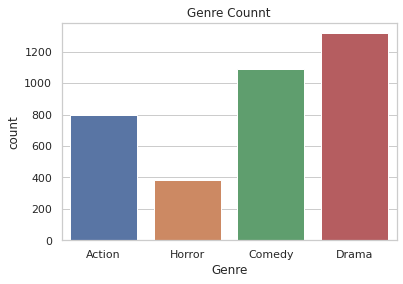

In [8]:
import seaborn as sns
sns.set(style='whitegrid')
figsize=(18, 6)
ax=sns.countplot(x=movies['Genre'], data=movies)
ax.set(xlabel='Genre',title="Genre Counnt")

In [9]:
import random
synNumber=random.randint(1,1000)
print(movies['Movie Name'].loc[synNumber])
print(movies['Genre'].loc[synNumber])
print(movies['Summary'].loc[synNumber])

Fjols til Fjells
Comedy
Everything that can go wrong goes wrong when care free ski bums, frustrated cabin owners, skiing Danes and partying youngsters team up on a Norwegian mountain resort with a very absent hotel manager.


In [ ]:
# nltk.download('stopwords')
# nltk.download('punkt')
# stop = stopwords.words('english')

In [14]:
data_clean=movies

In [ ]:
# data_clean=pd.read_csv('/content/gdrive/MyDrive/clean_data.csv')

In [10]:
no_drama=data_clean['Genre'].str.contains('Drama').sum()
no_comedy=data_clean['Genre'].str.contains('Comedy').sum()
no_horror=data_clean['Genre'].str.contains('Horror').sum()
no_action=data_clean['Genre'].str.contains('Action').sum()
print("Number of Drama movies:",no_drama)
print("Number of Comedy movies:",no_comedy)
print("Number of Horror movies:",no_horror)
print("Number of Action movies:",no_action)

NameError: ignored

In [15]:
lemmatizer = WordNetLemmatizer()
i=0
def lemmatize_text(text):
    global i
    # print (type(text))
    # i=i+1
    # print(i)
    text=str(text)
    return " ".join([lemmatizer.lemmatize(w) for w in text.split()])

In [16]:
nltk.download('wordnet')
data_clean["Plot_clean"] = data_clean["Summary"].apply(lambda text: lemmatize_text(text))
data_clean.head()
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
data_clean['Plot_clean'] = data_clean['Plot_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,index,S.No.,Movie Name,Director Name,Release Year,Genre,Summary,GenreID,Plot_clean
0,0,1,Dune,Denis Villeneuve,2021,Action,"Paul Atreides, a brilliant and gifted young ma...",2,"Paul Atreides, brilliant gifted young man born..."
1,1,2,Eternals,Chloé Zhao,2021,Action,"The Eternals, a race of immortal beings with s...",2,"The Eternals, race immortal superhuman power s..."
2,2,3,No Time To Die,Cary Joji Fukunaga,2021,Action,James Bond is enjoying a tranquil life in Jama...,2,James Bond enjoying tranquil life Jamaica leav...
3,3,4,Halloween Kills,David Gordon Green,2021,Horror,The nightmare isn't over as unstoppable killer...,3,The nightmare unstoppable killer Michael Myers...
4,4,5,The French Dispatch,Wes Anderson,2021,Comedy,A love letter to journalists set in an outpost...,1,A love letter journalist set outpost American ...


In [18]:
max_num_words=5000
max_seq_len=300
tokenizer = Tokenizer(num_words=max_num_words,filters='!"#$&%()*+-./:;<=>?@[\]^_`{|}~',lower=True)
tokenizer.fit_on_texts((data_clean['Plot_clean'].values))
sequences=tokenizer.texts_to_sequences((data_clean['Plot_clean'].values))
word_index=tokenizer.word_index
print("unique tokens:",len(word_index))
# max_len=np.max([len(sequence) for sequence in sequences])
print("Max length:",max_seq_len)
data = pad_sequences(sequences, maxlen=max_seq_len)
print("Shape of data tensor:",data.shape)

unique tokens: 14152
Max length: 300
Shape of data tensor: (3584, 300)


In [19]:
data[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [20]:
labels=np.asarray(data_clean['GenreID'].values)
labels=to_categorical(labels,num_classes=4)
print('Label:',labels.shape)
labels[50]

Label: (3584, 4)


array([0., 0., 0., 1.], dtype=float32)

In [21]:
X_train,X_val,y_train,y_val=train_test_split(data,labels,test_size=0.10,random_state=42,shuffle=True)

In [22]:
embedding_dim=100
model=Sequential()
model.add(Embedding(input_dim=max_num_words,output_dim=embedding_dim,input_length=data.shape[1]))
model.add(SpatialDropout1D(0.3))
# model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
# model.add(LSTM(8))
# model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(LSTM(64,return_sequences=True))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(LSTM(64,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-4,decay=1e-6),metrics=['categorical_accuracy'])
model.summary()
# 32,kernel_regularizer=l2(0.001),input_shape=(X_train.shape[1:]),activation='tanh'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          500000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 300, 64)           42240     
                                                                 
 dropout (Dropout)           (None, 300, 64)           0         
                                                                 
 batch_normalization (BatchN  (None, 300, 64)          256       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 32)                1

In [23]:
filepath="MovieGenrePredictionUsingPlotSummariesmodel1.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]
len(X_train),len(X_val)

(3225, 359)

In [24]:
history=model.fit(X_train,y_train, epochs=20, callbacks=callbacks_list, batch_size=32, validation_data=(X_val,y_val))

Epoch 1/20
101/101 [==============================] - 43s 377ms/step - loss: 1.5237 - categorical_accuracy: 0.2437 - val_loss: 1.3703 - val_categorical_accuracy: 0.3454
Epoch 2/20
101/101 [==============================] - 37s 367ms/step - loss: 1.4381 - categorical_accuracy: 0.2797 - val_loss: 1.3457 - val_categorical_accuracy: 0.3287
Epoch 3/20
101/101 [==============================] - 37s 369ms/step - loss: 1.3843 - categorical_accuracy: 0.3206 - val_loss: 1.3370 - val_categorical_accuracy: 0.3036
Epoch 4/20
101/101 [==============================] - 37s 366ms/step - loss: 1.3510 - categorical_accuracy: 0.3355 - val_loss: 1.3320 - val_categorical_accuracy: 0.3120
Epoch 5/20
101/101 [==============================] - 37s 368ms/step - loss: 1.3437 - categorical_accuracy: 0.3535 - val_loss: 1.3222 - val_categorical_accuracy: 0.3231
Epoch 6/20
101/101 [==============================] - 37s 366ms/step - loss: 1.3046 - categorical_accuracy: 0.3668 - val_loss: 1.3093 - val_categorical_acc

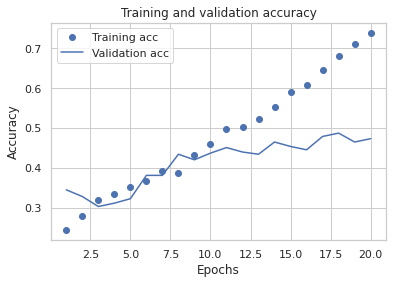

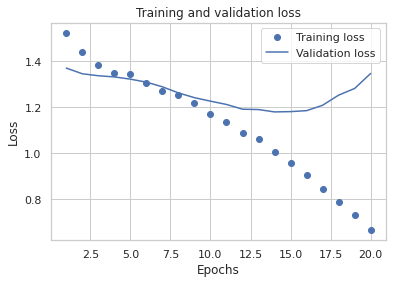

In [25]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
from tensorflow.python.keras.models import load_model

best_model = load_model('MovieGenrePredictionUsingPlotSummariesmodel1.h5')

In [27]:
batch_size=32
steps_test=int(len(X_val)/batch_size)
result = best_model.evaluate(X_val, y_val, steps=steps_test,verbose=1)
print("Validation-set accuracy: {0:.2%}".format(result[1]))

11/11 [==============================] - 2s 71ms/step - loss: 1.1800 - categorical_accuracy: 0.4652
Validation-set accuracy: 46.52%


In [ ]:
best_model.save('fypmodel{:.2%}.h5'.format(result[1]))
name='fypmodel{:.2%}.tflite'.format(result[1])
converter = tf.lite.TFLiteConverter.from_keras_model(best_model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open(name, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8s5c8jtj/assets


INFO:tensorflow:Assets written to: /tmp/tmp8s5c8jtj/assets


In [28]:
preds = best_model.predict(X_val, batch_size=128,verbose=1)
preds=np.around(preds)

orig_val_labels=np.argmax(y_val,axis=1)
predicted_labels=np.argmax(preds,axis=1)

orig_val_labels=np.reshape(orig_val_labels,(len(X_val),1))
predicted_labels=np.reshape(predicted_labels,(len(X_val),1))

print(predicted_labels.shape)
print(orig_val_labels.shape)

3/3 [==============================] - 1s 201ms/step
(359, 1)
(359, 1)


<Figure size 432x288 with 0 Axes>

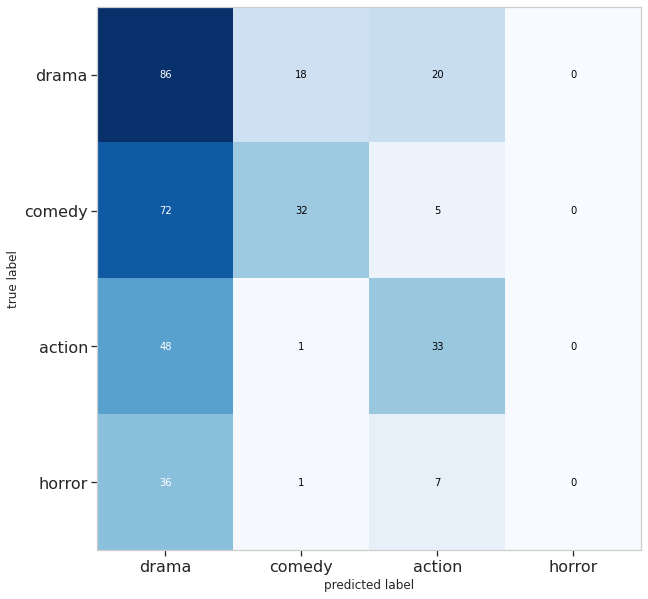

In [29]:
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_val_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(10,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(4), ['drama','comedy','action','horror'], fontsize=16)
plt.yticks(range(4), ['drama','comedy','action','horror'], fontsize=16)
plt.show()

In [30]:
MainGenres=['drama','comedy','action','horror']
print(classification_report(orig_val_labels,predicted_labels,target_names=MainGenres))

              precision    recall  f1-score   support

       drama       0.36      0.69      0.47       124
      comedy       0.62      0.29      0.40       109
      action       0.51      0.40      0.45        82
      horror       0.00      0.00      0.00        44

    accuracy                           0.42       359
   macro avg       0.37      0.35      0.33       359
weighted avg       0.43      0.42      0.39       359



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
